In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Load Data
df = pd.read_csv('/content/exoplanet_data.csv')
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
      kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2  10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      1.000              0              0              0              0  ...   
1      0.969              0              0              0              0  ...   
2      0.000              0              0              0              0  ...   
3      0.000              0              1              0              0  ...   
4      1.000              0              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_sl

In [10]:
# Clean Data
df = df[df['koi_disposition'].isin(['CONFIRMED', 'CANDIDATE'])]
data = df[['koi_period', 'koi_steff', 'koi_srad', 'koi_teq']].dropna()

In [13]:
data['Distance'] = (data['koi_period'] / 365.25) ** (2/3)
data = data.rename(columns={'koi_steff': 'Star_Temp', 'koi_srad': 'Star_Radius', 'koi_teq': 'Planet_Temp'})
print("Data after cleaning:")
print(data.head())

Data after cleaning:
   koi_period  Star_Temp  Star_Radius  Planet_Temp  Distance
0    9.488036     5455.0        0.927        793.0  0.087712
1   54.418383     5455.0        0.927        443.0  0.281041
2   19.899140     5853.0        0.868        638.0  0.143713
4    2.525592     6031.0        1.046       1406.0  0.036295
5   11.094321     6046.0        0.972        835.0  0.097351


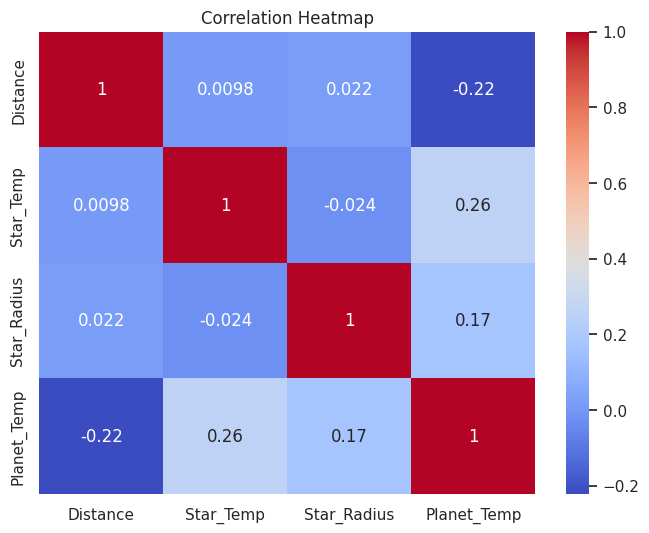

In [14]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Distance', 'Star_Temp', 'Star_Radius', 'Planet_Temp']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Log Transformation and Split
data['log_dist'] = np.log(data['Distance'])
data['log_star_temp'] = np.log(data['Star_Temp'])
data['log_star_radius'] = np.log(data['Star_Radius'])
data['log_planet_temp'] = np.log(data['Planet_Temp'])

X = data[['log_dist', 'log_star_temp', 'log_star_radius']]
y = data['log_planet_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Model Training & Visualization
model = LinearRegression()
model.fit(X_train, y_train)

preds_log = model.predict(X_test)
preds = np.exp(preds_log)
actual = np.exp(y_test)

Model Coefficients: [-0.49975296  0.82834135  0.44228959]
R2 Score: 0.995787700723699
Mean Absolute Error: 10.15527077084065


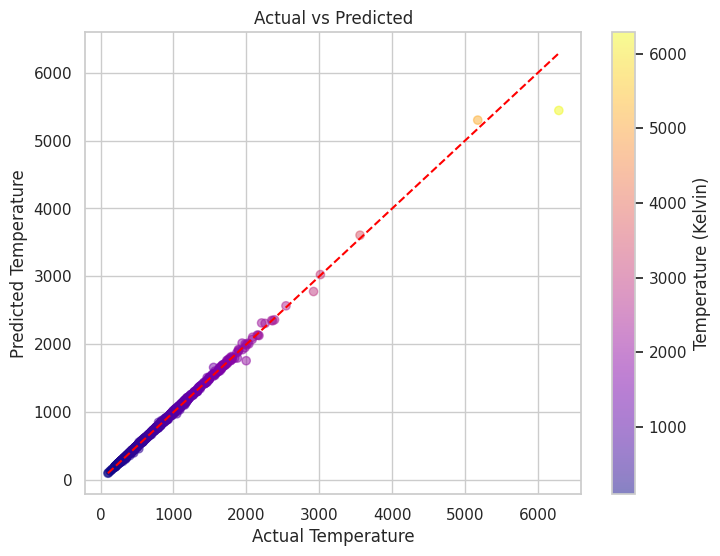

In [19]:
print("Model Coefficients:", model.coef_)
print("R2 Score:", r2_score(actual, preds))
print("Mean Absolute Error:", mean_absolute_error(actual, preds))

plt.figure(figsize=(8, 6))
plt.scatter(actual, preds, c=actual, cmap='plasma', alpha=0.5)
plt.colorbar(label='Temperature (Kelvin)')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], color='red', linestyle='--')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted")
plt.show()

In [24]:
# Sample Predictions
print("\n--- Sample Planet Predictions ---")
print(f"{'Planet Name':<20} | {'Status':<15} | {'Real Temp':<12} | {'Predicted Temp':<12}")
print("-" * 75)

test_indices = X_test.index
for i in range(5):
    idx = test_indices[i]
    name = df.loc[idx, 'kepoi_name']
    status = df.loc[idx, 'koi_disposition']
    real_temp = actual.iloc[i]
    pred_temp = preds[i]
    print(f"{str(name):<20} | {status:<15} | {real_temp:.0f} K       | {pred_temp:.0f} K")


--- Sample Planet Predictions ---
Planet Name          | Status          | Real Temp    | Predicted Temp
---------------------------------------------------------------------------
K01647.02            | CONFIRMED       | 683 K       | 680 K
K02386.01            | CANDIDATE       | 827 K       | 834 K
K02406.01            | CONFIRMED       | 1453 K       | 1436 K
K00758.01            | CONFIRMED       | 593 K       | 594 K
K03401.01            | CANDIDATE       | 750 K       | 742 K
